(prob-input:univariate-distributions:beta)=
# Beta Distribution

The Beta distribution is a four-parameter continuous probability distribution.
The table below summarizes some important aspects of the distribution.

|                     |                                                                                                                                                                                   |
|--------------------:|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|        **Notation** | $X \sim \mathrm{Beta}(\alpha, \beta, a, b)$                                                                                                                                       |
|      **Parameters** | $\alpha > 0$ (1<sup>st</sup> shape parameter)                                                                                                                                     |
|                     | $\beta > 0$ (2<sup>nd</sup> shape parameter)                                                                                                                                      |
|                     | $a \in (-\infty, b)$ (lower bound)                                                                                                                                                |
|                     | $b \in (a, \infty)$ (upper bound)                                                                                                                                                 |
| **{term}`Support`** | $\mathcal{D}_X = (0, 1)$                                                                                                                                                          |
|     **{term}`PDF`** | $f_X (x; \alpha, \beta, a, b) = \begin{cases} \frac{(x-a)^{\alpha-1} (b-x)^{\beta-1}}{(b-a)^{\alpha+\beta-1} B(\alpha, \beta)} & x \in [a, b] \\ 0 & x \notin [a, b] \end{cases}$ |
|     **{term}`CDF`** | $F_X (x; \alpha, \beta, a, b) = \begin{cases} 0 & x < a \\ \frac{1}{(b-a)^{\alpha+\beta-1} B(\alpha,\beta)} B(x; \alpha, \beta, a, b) & x \in [a, b] \\ 1 & x > b \end{cases}$    |
|    **{term}`ICDF`** | $F^{-1}_X (x; \alpha, \beta, a, b) = \left\{ y \, \vert \, \frac{B(y; \alpha, \beta, a, b)}{(b - a)^{\alpha + \beta - 1} B(\alpha, \beta)} = x \right\}$                          |


```{admonition} Beta function and incomplete Beta function
In the table above, $B(\alpha, \beta)$ and $B(x; \alpha, \beta, a, b)$
correspond to the Beta function and incomplete beta function on $(a, b)$, respectively.
The Beta function is defined as

$$
B(\alpha, \beta) \equiv \int_0^1 t^{\alpha-1} (1 - t)^{\beta-1} dt = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

where $\Gamma$ is the the Gamma function for positive real numbers

$$
\Gamma(x) = \int_0^\infty t^{x - 1} e^{-t} dt, \; x > 0.
$$

The incomplete Beta function is defined as

$$
B(x; \alpha, \beta, a, b) \equiv \int_a^x (t - a)^{\alpha - 1} (b - t)^{\beta - 1} dt.
$$

Note the difference between the above formulation with the usual incomplete 
Beta function defined on $(0, 1)$:

$$
B(x; \alpha, \beta) \equiv \int_0^x t^{\alpha - 1} (1 - t)^{\beta - 1} dt
$$
```

```{note}
The inverse cumulative distribution function (ICDF) of the Beta distribution
is given as an implicit equation and must be solved numerically.
```

The plots of probability density functions (PDFs),
sample histogram (of $5'000$ points),
cumulative distribution functions (CDFs),
and inverse cumulative distribution functions (ICDFs) for different parameter
values are shown below.

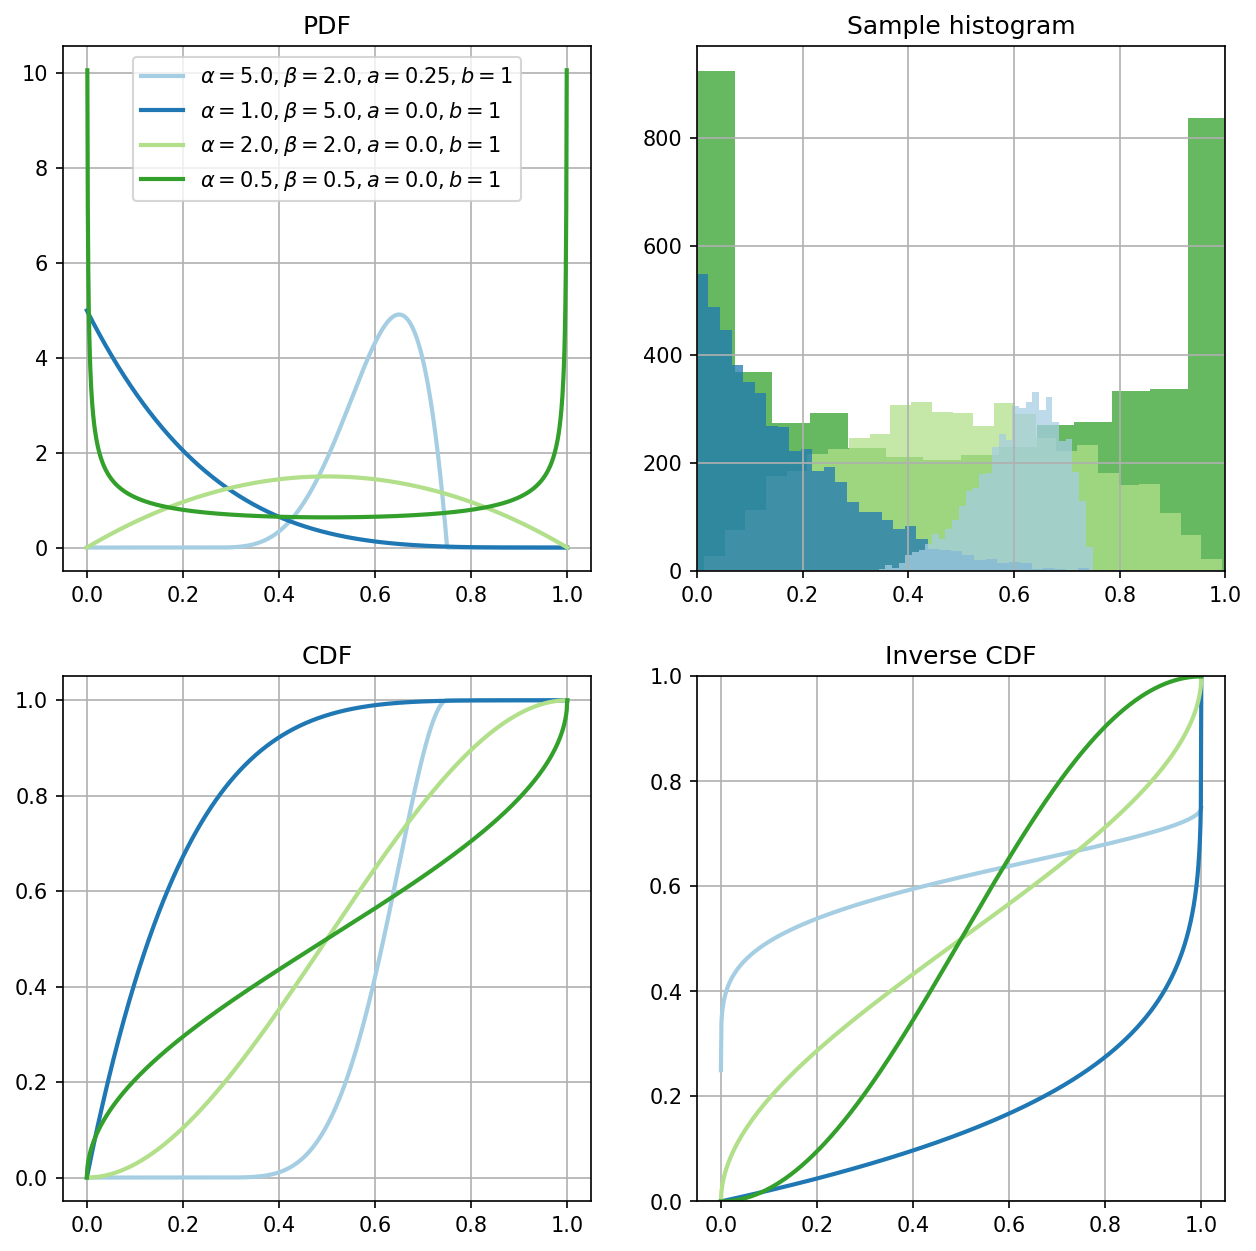

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

parameters = [[5, 2, 0.25, 0.75], [1, 5, 0., 1], [2, 2, 0., 1], [0.5, 0.5, 0., 1]]
colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"]

univ_dists = []
for parameter in parameters:
    univ_dists.append(uqtf.UnivDist(distribution="beta", parameters=parameter))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# --- PDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[0, 0].plot(
        xx,
        univ_dist.pdf(xx),
        color=colors[i],
        label=f"$\\alpha = {univ_dist.parameters[0]}, \\beta = {univ_dist.parameters[1]}, a = {univ_dist.parameters[2]}, b = {univ_dist.parameters[3]:.0f}$",
        linewidth=2,
    )
axs[0, 0].legend();
axs[0, 0].grid();
axs[0, 0].set_title("PDF");

# --- Sample histogram
sample_size = 5000
np.random.seed(42)
for col, univ_dist in zip(reversed(colors), reversed(univ_dists)):
    axs[0, 1].hist(
        univ_dist.get_sample(sample_size),
        color=col,
        bins="auto",
        alpha=0.75
    )
axs[0, 1].grid();
axs[0, 1].set_xlim([0, 1]);
axs[0, 1].set_title("Sample histogram");

# --- CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 0].plot(
        xx,
        univ_dist.cdf(xx),
        color=colors[i],
        linewidth=2,
    )
axs[1, 0].grid();
axs[1, 0].set_title("CDF");

# --- Inverse CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 1].plot(
        xx,
        univ_dist.icdf(xx),
        color=colors[i],
        linewidth=2
    )
axs[1, 1].grid();
axs[1, 1].set_ylim([0, 1]);
axs[1, 1].set_title("Inverse CDF");

plt.gcf().set_dpi(150)

As can be observed from the plots above, that:

- if $\alpha > 1.0$ and $\beta > 1.0$, then the density is unimodal;
- if $\alpha \leq 1.0$ or $\beta \leq 1.0$, 
  then the density is peaked at one or both boundaries;
- if $\alpha = \beta$, then the density function is symmetrical.

Note that when $\alpha = 1.0$ and $\beta = 1.0$, then the density is
a uniform density on $[0, 1]$; this is a special case of the Beta distribution.